# Tarea 6

## Isabel Larragain González

## 1 

Publica un mapa en _github_ con las siguientes características:

- Mostrando solo los delitos ocurridos a 5 Km de CENTRO durante cada año a partir del 2015. (Un mapa diferente por año)
- Mándame el *link* y el *notebook*

Haz una gráfica de barras mostrando los 5 *tipos* de delitos más comunes

In [127]:
import pandas as pd
from mapboxgl.viz import *
from mapboxgl.utils import*

In [128]:
denuncias_df = pd.read_csv("data/denuncias-victimas-pgj.csv", sep=";")

In [129]:
denuncias_df.shape

(50766, 14)

In [130]:
denuncias_df.head(1)

,idCarpeta,Delito,Categoria,FechaHecho,Sexo,Edad,TipoPersona,CalidadJuridica,lon,lat,Mes_año_hecho,Mes_hecho,Año_hecho,geopoint
0,8323533,ROBO DE VEHICULO DE SERVICIO PARTICULAR SIN VI...,ROBO DE VEHICULO SIN VIOLENCIA,02/01/2018 20:00,Masculino,45.0,FISICA,VICTIMA Y DENUNCIANTE,-99.071595,19.38703,2018-01-01,Enero,2018.0,"19.3870301317, -99.0715947135"


In [131]:
#LIMPIAR DATASET
denuncias_df.dropna(subset=["lat","lon"],inplace=True,how="any")

In [132]:
denuncias_df.shape

(49140, 14)

In [133]:
larragain_token = "pk.eyJ1IjoiaXNhYmVsbGdnIiwiYSI6ImNqdHVuYXR5bDFud28zemxsdmVrMzZkajcifQ.ruRXF6iVd1cQKs-ecyl4yg"

In [134]:
map_light_id= "mapbox://styles/isabellgg/cjtunib0f06ti1fo4xfmnh7dg"

Las coordenadas de CENTRO -99.204022,19.404859

In [135]:
centro_coords =[-99.204022,19.404859]

In [136]:
#km
radio =0.05

In [137]:
#definir área de 5km
denuncias_centro_df = denuncias_df[(abs(denuncias_df.lon - centro_coords[0])<radio) & (abs(denuncias_df.lat - centro_coords[1])<radio) ] 

In [138]:
denuncias_centro_df.shape

(10940, 14)

In [139]:
#años registrados en el área de centro
denuncias_centro_df.Año_hecho.unique()

array([2018., 2019., 2017., 2015., 2014., 2009., 2016., 2012., 2011.,
       2000., 2013., 1983., 2007., 1994., 2008.,   nan, 2010., 1995.,
       2005.])

# Años: 2015, 2016, 2017, 2018 y 2019

## 2015

In [140]:
denuncias__centro_2015_df= denuncias_centro_df[denuncias_centro_df.Año_hecho == 2015]

In [141]:
denuncias__centro_2015_df.shape

(43, 14)

In [142]:
df_to_geojson(denuncias__centro_2015_df, filename = "denuncias-centro-2015.geojson", 
              lat="lat", lon= "lon", 
              properties=["Delito", "Categoria", "Sexo", "Edad","Mes_hecho", "Año_hecho"])

{'type': 'file',
 'filename': 'denuncias-centro-2015.geojson',
 'feature_count': 43}

In [143]:
heatmap_color_stops = create_color_stops([0.1,0.25,0.5,0.75,1], colors='YlOrRd')
heatmap_radius_stops = [[9, 15], [20, 100]]
intensity_stops = [[9, 0.01], [20, 0.3]]


heatmap2015 = HeatmapViz('denuncias-centro-2015.geojson',
                 access_token=larragain_token,
                 color_stops = heatmap_color_stops,
                 radius_stops = heatmap_radius_stops,
                 intensity_stops = intensity_stops,
                 opacity = 0.9,
                 center = (-99.204022,19.404859),
                 zoom = 11.4,
                 style = map_light_id,
                 # building es la capa en el mapa en style reference 
                 below_layer ='building'
                )

heatmap2015.add_snapshot_links = True
heatmap2015.show()

C:\Users\isabe\Anaconda3\lib\site-packages\IPython\core\display.py:689: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


In [144]:
heatmap2015.create_html()

'<!DOCTYPE html>\n<html>\n<head>\n<title>mapboxgl-jupyter viz</title>\n<meta charset=\'UTF-8\' />\n<meta name=\'viewport\'\n      content=\'initial-scale=1,maximum-scale=1,user-scalable=no\' />\n<script type=\'text/javascript\'\n        src=\'https://api.tiles.mapbox.com/mapbox-gl-js/v0.53.0/mapbox-gl.js\'></script>\n<link type=\'text/css\'\n      href=\'https://api.tiles.mapbox.com/mapbox-gl-js/v0.53.0/mapbox-gl.css\' \n      rel=\'stylesheet\' />\n\n<style type=\'text/css\'>\n    body { margin:0; padding:0; }\n    .map { position: absolute; top:0; bottom:0; width:100%; }\n    .legend {\n        background-color: white;\n        color: #6e6e6e;\n        border-radius: 3px;\n        bottom: 10px;\n        box-shadow: 0 1px 2px rgba(0, 0, 0, 0.10);\n        font: 12px/20px \'Helvetica Neue\', Arial, Helvetica, sans-serif;\n        padding: 0;\n        position: absolute;\n        right: 10px;\n        z-index: 1;\n        min-width: 100px;\n    }\n   .legend.horizontal {bottom: 10px; te

In [145]:
with open("index.html", "w") as file_name:
        file_name.write(heatmap2015.create_html())

## 2016

In [146]:
denuncias__centro_2016_df= denuncias_centro_df[denuncias_centro_df.Año_hecho == 2016]

In [147]:
denuncias__centro_2016_df.shape

(66, 14)

In [148]:
df_to_geojson(denuncias__centro_2016_df, filename = "denuncias-centro-2016.geojson", 
              lat="lat", lon= "lon", 
              properties=["Delito", "Categoria", "Sexo", "Edad","Mes_hecho", "Año_hecho"])

{'type': 'file',
 'filename': 'denuncias-centro-2016.geojson',
 'feature_count': 66}

In [149]:
heatmap_color_stops = create_color_stops([0.1,0.25,0.5,0.75,1], colors='YlOrRd')
heatmap_radius_stops = [[9, 15], [20, 100]]
intensity_stops = [[9, 0.01], [20, 0.3]]


heatmap2016 = HeatmapViz('denuncias-centro-2016.geojson',
                 access_token=larragain_token,
                 color_stops = heatmap_color_stops,
                 radius_stops = heatmap_radius_stops,
                 intensity_stops = intensity_stops,
                 opacity = 0.9,
                 center = (-99.204022,19.404859),
                 zoom = 11.4,
                 style = map_light_id,
                 # building es la capa en el mapa en style reference 
                 below_layer ='building'
                )

heatmap2016.add_snapshot_links = True
heatmap2016.show()

In [150]:
heatmap2016.create_html()

'<!DOCTYPE html>\n<html>\n<head>\n<title>mapboxgl-jupyter viz</title>\n<meta charset=\'UTF-8\' />\n<meta name=\'viewport\'\n      content=\'initial-scale=1,maximum-scale=1,user-scalable=no\' />\n<script type=\'text/javascript\'\n        src=\'https://api.tiles.mapbox.com/mapbox-gl-js/v0.53.0/mapbox-gl.js\'></script>\n<link type=\'text/css\'\n      href=\'https://api.tiles.mapbox.com/mapbox-gl-js/v0.53.0/mapbox-gl.css\' \n      rel=\'stylesheet\' />\n\n<style type=\'text/css\'>\n    body { margin:0; padding:0; }\n    .map { position: absolute; top:0; bottom:0; width:100%; }\n    .legend {\n        background-color: white;\n        color: #6e6e6e;\n        border-radius: 3px;\n        bottom: 10px;\n        box-shadow: 0 1px 2px rgba(0, 0, 0, 0.10);\n        font: 12px/20px \'Helvetica Neue\', Arial, Helvetica, sans-serif;\n        padding: 0;\n        position: absolute;\n        right: 10px;\n        z-index: 1;\n        min-width: 100px;\n    }\n   .legend.horizontal {bottom: 10px; te

In [151]:
with open("index.html", "w") as file_name:
        file_name.write(heatmap2016.create_html())

## 2017

In [152]:
denuncias__centro_2017_df= denuncias_centro_df[denuncias_centro_df.Año_hecho == 2017]

In [153]:
denuncias__centro_2017_df.shape

(144, 14)

In [154]:
df_to_geojson(denuncias__centro_2017_df, filename = "denuncias-centro-2017.geojson", 
              lat="lat", lon= "lon", 
              properties=["Delito", "Categoria", "Sexo", "Edad","Mes_hecho", "Año_hecho"])

{'type': 'file',
 'filename': 'denuncias-centro-2017.geojson',
 'feature_count': 144}

In [155]:
heatmap_color_stops = create_color_stops([0.1,0.25,0.5,0.75,1], colors='YlOrRd')
heatmap_radius_stops = [[9, 15], [20, 100]]
intensity_stops = [[9, 0.01], [20, 0.3]]


heatmap2017 = HeatmapViz('denuncias-centro-2017.geojson',
                 access_token=larragain_token,
                 color_stops = heatmap_color_stops,
                 radius_stops = heatmap_radius_stops,
                 intensity_stops = intensity_stops,
                 opacity = 0.9,
                 center = (-99.204022,19.404859),
                 zoom = 11.4,
                 style = map_light_id,
                 # building es la capa en el mapa en style reference 
                 below_layer ='building'
                )

heatmap2017.add_snapshot_links = True
heatmap2017.show()

In [156]:
heatmap2017.create_html()

'<!DOCTYPE html>\n<html>\n<head>\n<title>mapboxgl-jupyter viz</title>\n<meta charset=\'UTF-8\' />\n<meta name=\'viewport\'\n      content=\'initial-scale=1,maximum-scale=1,user-scalable=no\' />\n<script type=\'text/javascript\'\n        src=\'https://api.tiles.mapbox.com/mapbox-gl-js/v0.53.0/mapbox-gl.js\'></script>\n<link type=\'text/css\'\n      href=\'https://api.tiles.mapbox.com/mapbox-gl-js/v0.53.0/mapbox-gl.css\' \n      rel=\'stylesheet\' />\n\n<style type=\'text/css\'>\n    body { margin:0; padding:0; }\n    .map { position: absolute; top:0; bottom:0; width:100%; }\n    .legend {\n        background-color: white;\n        color: #6e6e6e;\n        border-radius: 3px;\n        bottom: 10px;\n        box-shadow: 0 1px 2px rgba(0, 0, 0, 0.10);\n        font: 12px/20px \'Helvetica Neue\', Arial, Helvetica, sans-serif;\n        padding: 0;\n        position: absolute;\n        right: 10px;\n        z-index: 1;\n        min-width: 100px;\n    }\n   .legend.horizontal {bottom: 10px; te

In [157]:
with open("index.html", "w") as file_name:
        file_name.write(heatmap2017.create_html())

## 2018

In [158]:
denuncias__centro_2018_df= denuncias_centro_df[denuncias_centro_df.Año_hecho == 2018]

In [159]:
denuncias__centro_2018_df.shape

(2529, 14)

In [160]:
df_to_geojson(denuncias__centro_2018_df, filename = "denuncias-centro-2018.geojson", 
              lat="lat", lon= "lon", 
              properties=["Delito", "Categoria", "Sexo", "Edad","Mes_hecho", "Año_hecho"])

{'type': 'file',
 'filename': 'denuncias-centro-2018.geojson',
 'feature_count': 2529}

In [161]:
heatmap_color_stops = create_color_stops([0.1,0.25,0.5,0.75,1], colors='YlOrRd')
heatmap_radius_stops = [[9, 15], [20, 100]]
intensity_stops = [[9, 0.01], [20, 0.3]]


heatmap2018 = HeatmapViz('denuncias-centro-2018.geojson',
                 access_token=larragain_token,
                 color_stops = heatmap_color_stops,
                 radius_stops = heatmap_radius_stops,
                 intensity_stops = intensity_stops,
                 opacity = 0.9,
                 center = (-99.204022,19.404859),
                 zoom = 11.4,
                 style = map_light_id,
                 # building es la capa en el mapa en style reference 
                 below_layer ='building'
                )

heatmap2018.add_snapshot_links = True
heatmap2018.show()

In [162]:
heatmap2018.create_html()

'<!DOCTYPE html>\n<html>\n<head>\n<title>mapboxgl-jupyter viz</title>\n<meta charset=\'UTF-8\' />\n<meta name=\'viewport\'\n      content=\'initial-scale=1,maximum-scale=1,user-scalable=no\' />\n<script type=\'text/javascript\'\n        src=\'https://api.tiles.mapbox.com/mapbox-gl-js/v0.53.0/mapbox-gl.js\'></script>\n<link type=\'text/css\'\n      href=\'https://api.tiles.mapbox.com/mapbox-gl-js/v0.53.0/mapbox-gl.css\' \n      rel=\'stylesheet\' />\n\n<style type=\'text/css\'>\n    body { margin:0; padding:0; }\n    .map { position: absolute; top:0; bottom:0; width:100%; }\n    .legend {\n        background-color: white;\n        color: #6e6e6e;\n        border-radius: 3px;\n        bottom: 10px;\n        box-shadow: 0 1px 2px rgba(0, 0, 0, 0.10);\n        font: 12px/20px \'Helvetica Neue\', Arial, Helvetica, sans-serif;\n        padding: 0;\n        position: absolute;\n        right: 10px;\n        z-index: 1;\n        min-width: 100px;\n    }\n   .legend.horizontal {bottom: 10px; te

In [163]:
with open("index.html", "w") as file_name:
        file_name.write(heatmap2018.create_html())

## 2019

In [164]:
denuncias__centro_2019_df= denuncias_centro_df[denuncias_centro_df.Año_hecho == 2019]

In [165]:
denuncias__centro_2019_df.shape

(8052, 14)

In [166]:
df_to_geojson(denuncias__centro_2019_df, filename = "denuncias-centro-2019.geojson", 
              lat="lat", lon= "lon", 
              properties=["Delito", "Categoria", "Sexo", "Edad","Mes_hecho", "Año_hecho"])

{'type': 'file',
 'filename': 'denuncias-centro-2019.geojson',
 'feature_count': 8052}

In [167]:
heatmap_color_stops = create_color_stops([0.1,0.25,0.5,0.75,1], colors='YlOrRd')
heatmap_radius_stops = [[9, 15], [20, 100]]
intensity_stops = [[9, 0.01], [20, 0.3]]


heatmap2019 = HeatmapViz('denuncias-centro-2019.geojson',
                 access_token=larragain_token,
                 color_stops = heatmap_color_stops,
                 radius_stops = heatmap_radius_stops,
                 intensity_stops = intensity_stops,
                 opacity = 0.9,
                 center = (-99.204022,19.404859),
                 zoom = 11.4,
                 style = map_light_id,
                 # building es la capa en el mapa en style reference 
                 below_layer ='building'
                )

heatmap2019.add_snapshot_links = True
heatmap2019.show()

In [168]:
heatmap2019.create_html()

'<!DOCTYPE html>\n<html>\n<head>\n<title>mapboxgl-jupyter viz</title>\n<meta charset=\'UTF-8\' />\n<meta name=\'viewport\'\n      content=\'initial-scale=1,maximum-scale=1,user-scalable=no\' />\n<script type=\'text/javascript\'\n        src=\'https://api.tiles.mapbox.com/mapbox-gl-js/v0.53.0/mapbox-gl.js\'></script>\n<link type=\'text/css\'\n      href=\'https://api.tiles.mapbox.com/mapbox-gl-js/v0.53.0/mapbox-gl.css\' \n      rel=\'stylesheet\' />\n\n<style type=\'text/css\'>\n    body { margin:0; padding:0; }\n    .map { position: absolute; top:0; bottom:0; width:100%; }\n    .legend {\n        background-color: white;\n        color: #6e6e6e;\n        border-radius: 3px;\n        bottom: 10px;\n        box-shadow: 0 1px 2px rgba(0, 0, 0, 0.10);\n        font: 12px/20px \'Helvetica Neue\', Arial, Helvetica, sans-serif;\n        padding: 0;\n        position: absolute;\n        right: 10px;\n        z-index: 1;\n        min-width: 100px;\n    }\n   .legend.horizontal {bottom: 10px; te

In [169]:
with open("index.html", "w") as file_name:
        file_name.write(heatmap2019.create_html())

## 5 delitos más comunes

In [170]:
denuncias_centro_df.head(1)

,idCarpeta,Delito,Categoria,FechaHecho,Sexo,Edad,TipoPersona,CalidadJuridica,lon,lat,Mes_año_hecho,Mes_hecho,Año_hecho,geopoint
5,8323524,ROBO A REPARTIDOR CON VIOLENCIA,ROBO A REPARTIDOR CON VIOLENCIA,03/01/2018 15:25,Masculino,19.0,FISICA,DENUNCIANTE,-99.243256,19.380147,2018-01-01,Enero,2018.0,"19.3801468321, -99.2432563427"


In [190]:
denuncias_centro_df.Delito.unique()

array(['ROBO A REPARTIDOR CON VIOLENCIA', 'ROBO A NEGOCIO SIN VIOLENCIA',
       'ROBO A PASAJERO A BORDO DE METRO SIN VIOLENCIA',
       'LESIONES INTENCIONALES POR GOLPES', 'FRAUDE',
       'ROBO DE OBJETOS DEL INTERIOR DE UN VEHICULO',
       'CORRUPCION DE MENORES', 'ABUSO DE CONFIANZA', 'AMENAZAS',
       'ROBO DE ACCESORIOS DE AUTO', 'ROBO DE OBJETOS',
       'FALSEDAD DE DECLARACIONES',
       'DAÑO EN PROPIEDAD AJENA INTENCIONAL A AUTOMOVIL',
       'ROBO A PASAJERO / CONDUCTOR DE VEHICULO CON VIOLENCIA',
       'ROBO DE PLACA DE AUTOMOVIL', 'ROBO A NEGOCIO CON VIOLENCIA',
       'ROBO A PASAJERO A BORDO DE PESERO COLECTIVO CON VIOLENCIA',
       'ROBO A PASAJERO / CONDUCTOR DE TAXI CON VIOLENCIA',
       'USURPACIÓN DE IDENTIDAD', 'REVELACION DE SECRETOS',
       'FALSIFICACION DE TITULOS AL PORTADOR Y DOCUMENTOS DE CREDITO PUBLICO',
       'ABANDONO DE PERSONA',
       'ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA',
       'ROBO A CASA HABITACION SIN VIOLENCIA', 'VIOLENCIA 

In [216]:
from collections import Counter
import matplotlib.pyplot as plt

In [272]:
print(Counter(denuncias_centro_df.Delito))

Counter({'ROBO A NEGOCIO SIN VIOLENCIA': 1202, 'FRAUDE': 817, 'ROBO DE OBJETOS': 723, 'ROBO A NEGOCIO CON VIOLENCIA': 620, 'VIOLENCIA FAMILIAR': 530, 'ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA': 513, 'ABUSO DE CONFIANZA': 446, 'FALSIFICACION DE TITULOS AL PORTADOR Y DOCUMENTOS DE CREDITO PUBLICO': 410, 'ROBO DE ACCESORIOS DE AUTO': 402, 'ROBO DE OBJETOS DEL INTERIOR DE UN VEHICULO': 359, 'AMENAZAS': 331, 'ROBO A PASAJERO / CONDUCTOR DE VEHICULO CON VIOLENCIA': 270, 'ROBO A CASA HABITACION SIN VIOLENCIA': 231, 'ROBO DE VEHICULO DE PEDALES': 214, 'ROBO DE VEHICULO DE SERVICIO PARTICULAR SIN VIOLENCIA': 211, 'USURPACIÓN DE IDENTIDAD': 202, 'ROBO A REPARTIDOR CON VIOLENCIA': 184, 'ROBO A PASAJERO A BORDO DE METRO SIN VIOLENCIA': 179, 'ROBO A TRANSEUNTE DE CELULAR CON VIOLENCIA': 159, 'DAÑO EN PROPIEDAD AJENA INTENCIONAL': 115, 'DESPOJO': 96, 'ROBO A PASAJERO A BORDO DE METROBUS SIN VIOLENCIA': 96, 'ABUSO SEXUAL': 87, 'LESIONES CULPOSAS POR TRANSITO VEHICULAR EN COLISION': 87, 'LESIONE

In [278]:
delitos_comunes_df = pd.DataFrame.from_dict(delitos_comunes, orient = "index").reset_index()

In [305]:
delitos_comunes_df = delitos_comunes_df.rename(columns = {"index": 'Delito' , 0: "Cantidad"})

In [306]:
delitos_comunes_df.sort_values(by=["Cantidad"], ascending=[False]).head(5)

,Delito,Cantidad
1,ROBO A NEGOCIO SIN VIOLENCIA,1202
4,FRAUDE,817
10,ROBO DE OBJETOS,723
15,ROBO A NEGOCIO CON VIOLENCIA,620
24,VIOLENCIA FAMILIAR,530


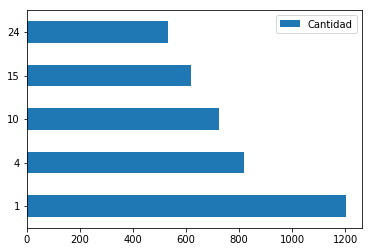

In [307]:
delitos_comunes_df.sort_values(by=["Cantidad"], ascending=[False]).head(5).plot.barh()

## 2

Ve el documental **The joy of stats** (BBC, 2010)

https://vimeo.com/18477762

## 3

Busca quién es Lev Manovich